In [1]:
import os

import pandas as pd


dfs = []

for f in os.listdir('../data/foodhwy'):
    if f.endswith('.csv'):
        dfs.append(pd.read_csv(f'../data/foodhwy/{f}'))


df = pd.concat(dfs).drop_duplicates('order_id').reset_index(drop=True)

In [2]:
import numpy as np

dt = pd.to_datetime(df.date)
df['day'] = dt.dt.date
df['month'] = dt.dt.month

f = np.vectorize(lambda d: d.isoformat())
dates = np.sort(f(df['day'].unique()))
print(f'From {dates[0]} to {dates[-1]}, total {len(df)} orders in {len(dates)} days')

From 2020-01-09 to 2021-05-01, total 2042 orders in 340 days


In [3]:
df['hour'] = pd.to_datetime(df.date).dt.hour
df

,order_id,date,subtotal,tax,Commission after Tax,Promotion Subsidy,Net Payout,pay type,order type,day,month,hour
0,9881840,2020-09-05 16:07:02,54.99,7.15,0.00,7.88,46.12,onlinepay,delivery,2020-09-05,9,16
1,9881877,2020-09-05 16:18:31,63.93,8.31,0.00,28.90,43.34,onlinepay,delivery,2020-09-05,9,16
2,9881889,2020-09-05 16:20:55,43.47,5.65,0.00,19.65,29.47,onlinepay,delivery,2020-09-05,9,16
3,9881914,2020-09-05 16:25:59,51.95,6.75,0.00,23.48,-23.48,cashpay,delivery,2020-09-05,9,16
4,9881929,2020-09-05 16:28:57,37.96,4.94,0.00,17.16,25.74,onlinepay,delivery,2020-09-05,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2037,7160364,2020-05-17 16:26:34,36.47,4.74,4.95,8.24,28.02,onlinepay,delivery,2020-05-17,5,16
2038,7160469,2020-05-17 16:27:48,39.46,5.13,5.35,8.92,30.32,onlinepay,delivery,2020-05-17,5,16
2039,7160595,2020-05-17 16:29:53,83.96,10.92,11.38,18.98,64.51,onlinepay,delivery,2020-05-17,5,16
2040,7161372,2020-05-17 16:40:26,93.42,12.15,12.67,21.11,71.79,onlinepay,delivery,2020-05-17,5,16


In [4]:
metrics = ['subtotal', 'Commission after Tax', 'Promotion Subsidy', 'Net Payout']
stats = ['sum', 'mean', 'median', 'std']
gb = df.groupby('hour').agg({
    **{k: stats for k in metrics},
    'order_id': 'count',
})
gb

subtotal                               Commission after Tax            \
           sum       mean  median        std                  sum      mean   
hour                                                                          
12      410.14  25.633750  24.485   8.219630                69.52  4.345000   
13      193.82  21.535556  19.970   6.934723                32.85  3.650000   
14      104.45  26.112500  26.490   4.312775                17.70  4.425000   
15      703.44  46.896000  46.970  24.544576                92.50  6.166667   
16    21337.48  46.185022  36.965  29.334916              3561.17  7.708160   
17    17545.28  44.194660  31.990  33.238350              2523.99  6.357657   
18    17151.94  43.095327  32.970  30.161542              2346.06  5.894623   
19    13037.08  40.997107  31.985  28.019764              1923.36  6.048302   
20    10567.52  42.957398  34.465  28.420144              1449.86  5.893740   
21     7081.32  40.007458  31.980  26.626640              1099.62  6.212542   

                      Promotion Subsidy                               \
     median       std               sum       mean median        std   
hour                                                                   
12    4.150  1.392379              0.00   0.000000  0.000   0.000000   
13    3.390  1.173946              0.00   0.000000  0.000   0.000000   
14    4.490  0.730548              0.00   0.000000  0.000   0.000000   
15    5.570  2.679831            178.20  11.880000  9.660  11.815259   
16    4.930  9.263523           3975.64   8.605281  5.675   9.775196   
17    4.230  7.368131           3659.94   9.218992  5.980  13.050508   
18    4.270  6.561583           3894.20   9.784422  6.310  12.095857   
19    4.005  6.895312           2668.27   8.390786  6.415   9.287349   
20    4.150  6.629162           2207.50   8.973577  6.460  10.799132   
21    4.720  5.919988           1253.89   7.084124  5.190   7.901825   

     Net Payout                               order_id  
            sum       mean  median        std    count  
hour                                                    
12        74.98   4.686250  -3.515  15.798743       16  
13        39.40   4.377778  -3.130  12.714191        9  
14        42.16  10.540000  10.985  17.220377        4  
15       400.58  26.705333  31.590  23.938519       15  
16     11322.50  24.507576  23.420  29.833638      462  
17      8347.00  21.025189  21.340  31.084645      397  
18      7575.31  19.033442  19.025  29.372480      398  
19      6149.57  19.338270  19.660  29.969239      318  
20      4996.18  20.309675  20.700  28.570616      246  
21      2927.26  16.538192  17.310  29.330346      177

In [5]:
import matplotlib.pyplot as plot
import seaborn as sns

sns.set_theme(style='darkgrid')


def heatmap(df, stats: str = 'mean', normalize: bool = False):
    cols = gb.columns.map(lambda x: x[1] == stats)
    df = gb[gb.columns[cols]]

    if normalize:
        # apply min-max normalization
        df = (df - df.min()) / (df.max() - df.min())

    _, ax = plot.subplots(figsize=(15, 5))
    heatmap = sns.heatmap(df, annot=True, fmt='.2f', ax=ax)
    plot.xlabel(stats)

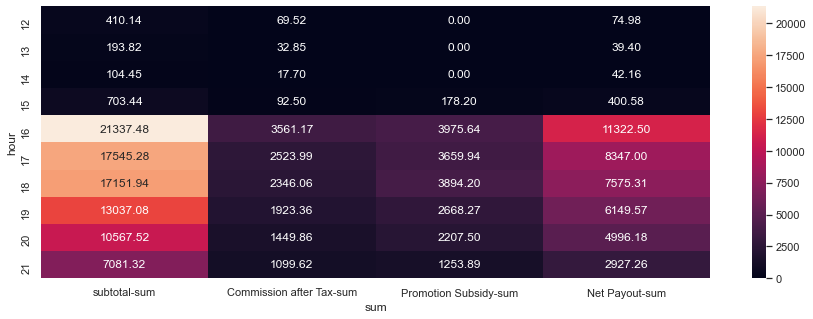

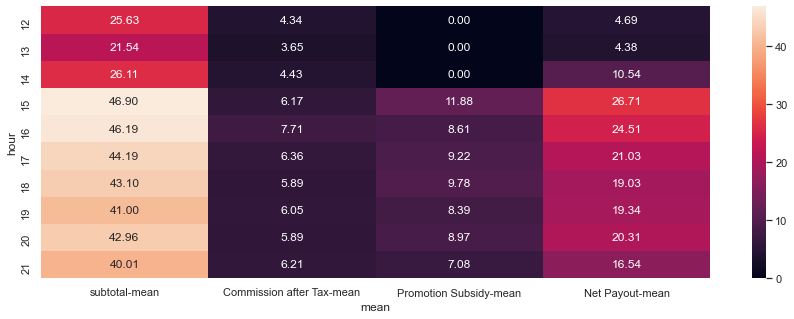

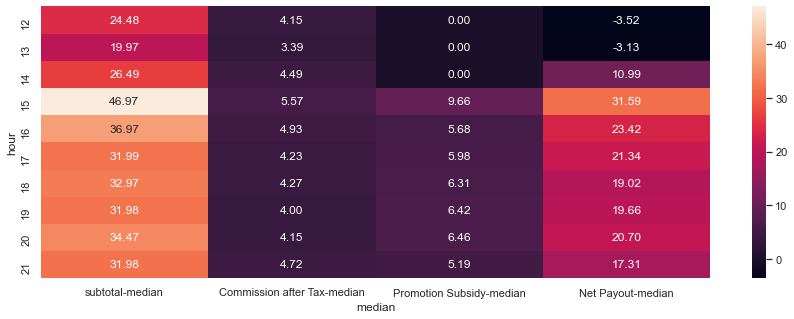

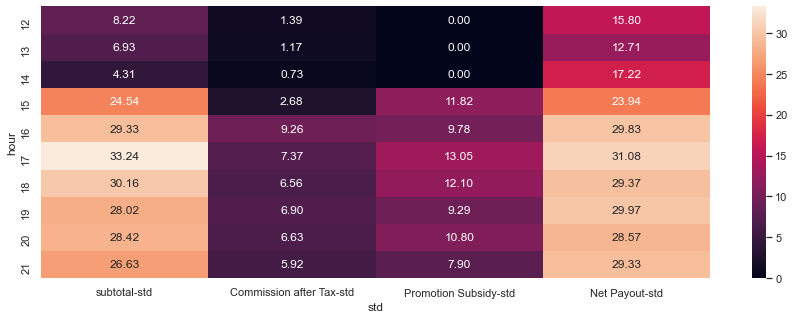

In [6]:
for s in stats:
    heatmap(gb, stats=s)

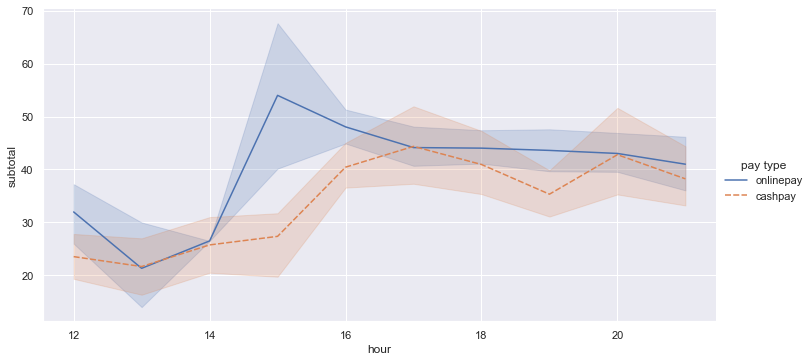

In [7]:
sub = sns.relplot(
    data=df,
    x='hour',
    y='subtotal',
    hue='pay type',
    style='pay type',
    kind='line',
    aspect=2,
)

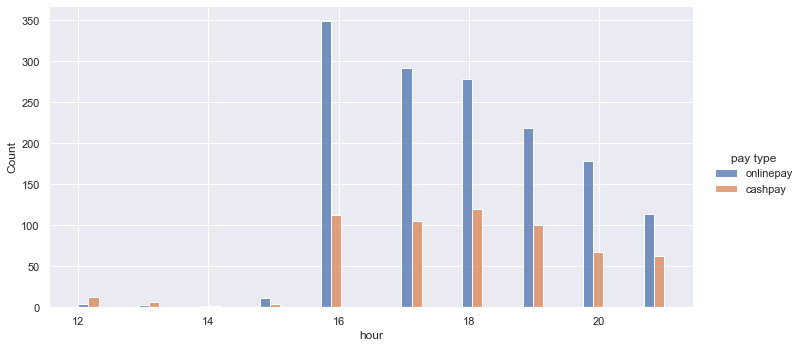

In [8]:
orders = sns.displot(
    data=df,
    x='hour',
    hue='pay type',
    multiple='dodge',
    aspect=2,
)

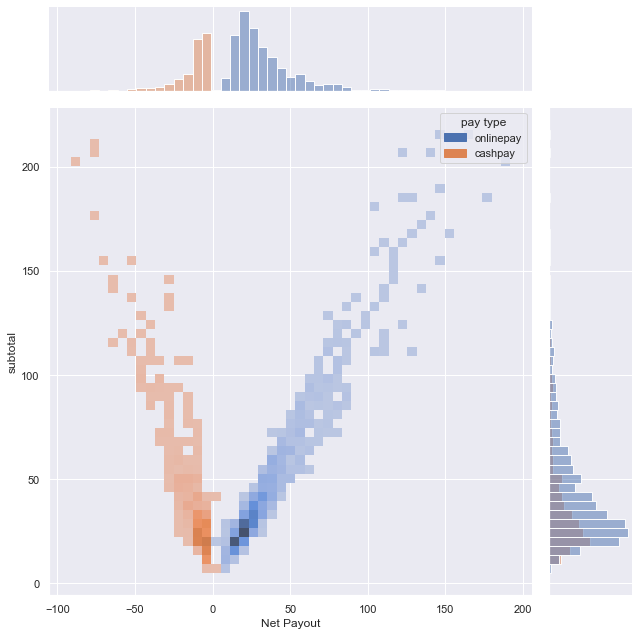

In [9]:
sub_net = sns.jointplot(
    data=df,
    x='Net Payout',
    y='subtotal',
    hue='pay type',
    height=9,
    kind='hist',
)